In [1]:
# Импортируем pandas, подготавливаем исходные данные
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_df = churn_data.drop(['RowNumber'], axis=1)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [2]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

### ЗАДАНИЯ

##### **9.1.** Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

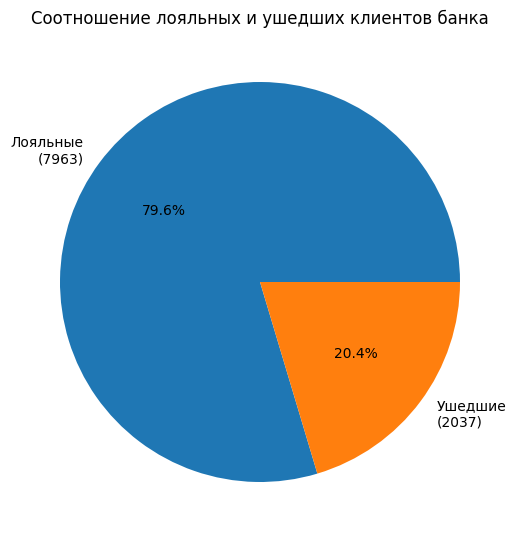

In [3]:
# Считаем ушедших и лояльных клиентов
# Сортируем по индексу, чтобы первыми в серии были лояльные (индекс 0)
client_status_count = churn_df.groupby('Exited')['Exited'].count().sort_index()

# Отображаем их соотношение на круговой диаграмме
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
# Отдельно задаем подписи для диаграммы (чтобы видеть количества клиентов)
plot_labels = ['Лояльные' + '\n(' + str(client_status_count.loc[0]) + ')',
               'Ушедшие' + '\n(' + str(client_status_count.loc[1]) + ')']
axes.pie(
    client_status_count,
    labels=plot_labels,
    explode = [0, 0],
    autopct='%.1f%%',
)
axes.set_title('Соотношение лояльных и ушедших клиентов банка');

**Комментарий.** Банк покидает каждый пятый клиент. Всего из банка ушло 2037 пользователей из 10000


##### **9.2.** Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

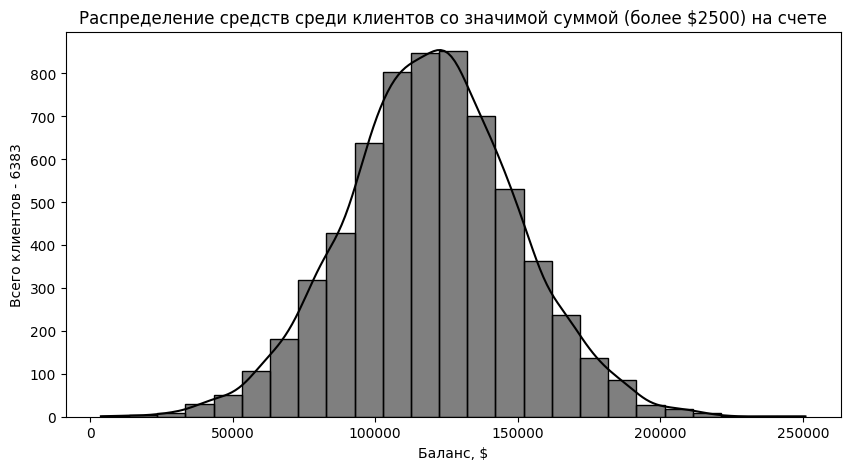

In [4]:
# Отбираем пользователей со счетом более 2500
clients_balance_2500 = churn_df[churn_df['Balance'] > 2500][['Balance','Exited']]

# Визуализируем распределение с помощью ящика с усами
fig = plt.figure(figsize=(10, 5))
boxplot = sns.histplot(
    data=clients_balance_2500,
    x='Balance',
    binwidth=10000, # задаем ширину  бина, а не количество бинов
    kde=True,
    color='0'
)
boxplot.set_title('Распределение средств среди клиентов со значимой суммой (более $2500) на счете')
boxplot.set_xlabel('Баланс, $')
# Общее количество клиентов со значимой суммой отражаем на оси y
boxplot.set_ylabel('Всего клиентов - ' + str(clients_balance_2500['Balance'].count()));

**Комментарий.** Большая часть клиентов "с деньгами" имеет баланс около 90-150 тысяч долларов, с максимумом около 120 тысяч долларов. Можно предположить, что это ключевые клиенты. Количество пользователей с более низким или более высоким балансом резко снижается.

##### **9.3.** Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

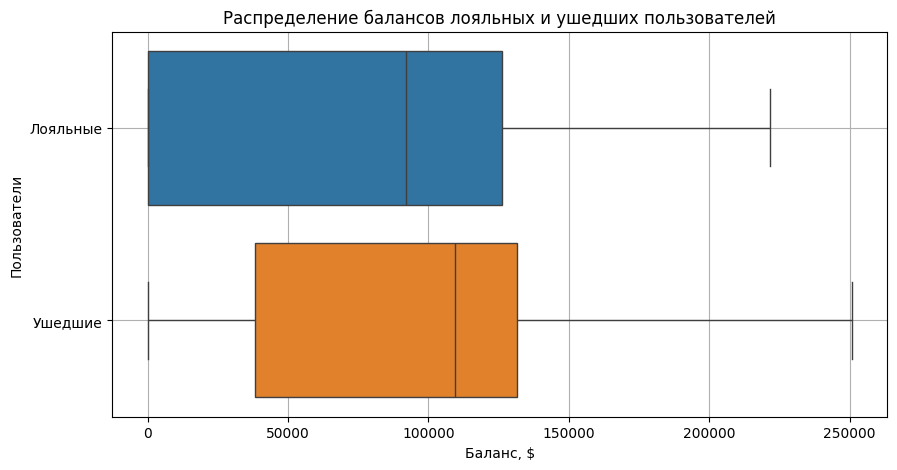

In [5]:
# Добавляем признак "ушедшие" и "лояльные" для будущего отражения в подисях вместо 1 и 0 
churn_df['ExitedName'] = churn_df['Exited'].apply(lambda x: 'Ушедшие' if x == 1 else 'Лояльные')
churn_df = churn_df.sort_values('Exited')

# Отражаем распределение с помощью коробчатых диаграмм
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_df,
    y='ExitedName',
    x='Balance',
    hue='ExitedName'
)
boxplot.set_title('Распределение балансов лояльных и ушедших пользователей');
boxplot.set_xlabel('Баланс, $');
boxplot.set_ylabel('Пользователи');
boxplot.grid();

**Комментарий.** Распределение баланса ушедших клиентов близко (по медиане и межквартильному размаху) к распределению клиентов с балансом более $2500, расмотренного выше. По этому признаку покинувших банк пользователей можно было бы отнести к ключевым клиентам "с деньгами". Видно, что медианное значение балансов оставшихся клиентов намного ниже ушедших и значительную часть из "как бы лояльных" составляют пользователи с балансом менее $2500 (медианное значение снижено до 90 тысяч, а межквартильный размах доходит до нулевых значений).  
Исходя из этих данных, можно предположить, что содержание значительных средств в банке перестало быть выгодным, возможно возник риск их потери, или банки-конкуренты предложили лучшие условия. 

##### **9.4.** Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

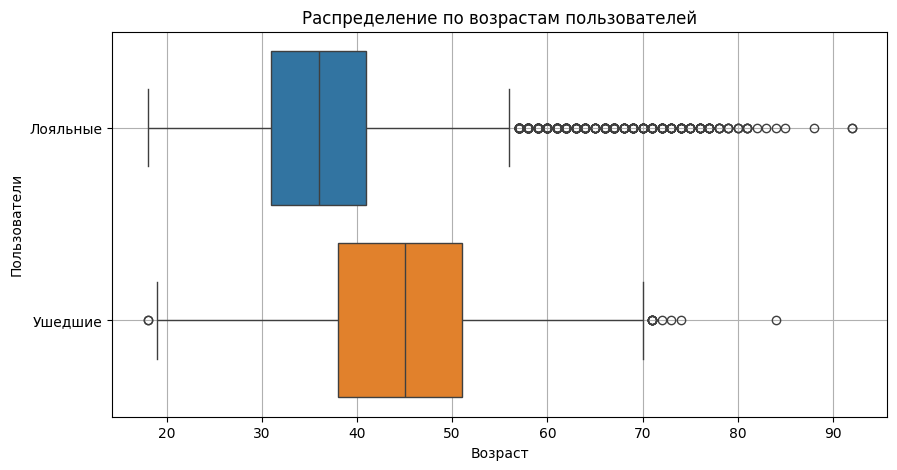

In [6]:
# Отражаем распределение по возрасту с помощью коробчатых диаграмм
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_df,
    y='ExitedName',
    x='Age',
    hue='ExitedName'
)
boxplot.set_title('Распределение по возрастам пользователей');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Пользователи');
boxplot.grid();

**Комментарий.** Средний возраст ушедших из банка клиентов примерно на 10 лет более высокий, чем у оставшихся пользователей, и составляет 40-50 лет. При этом количество потенциальных выбросов по возрасту более высокое среди оставшихся клиентов и наблюдается оно в группе "старше 60". Таким образом для удержания оттока клиентов банку особое внимание следует уделить группе клиентов среднего возраста 40-50 лет.

##### **9.5.** Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

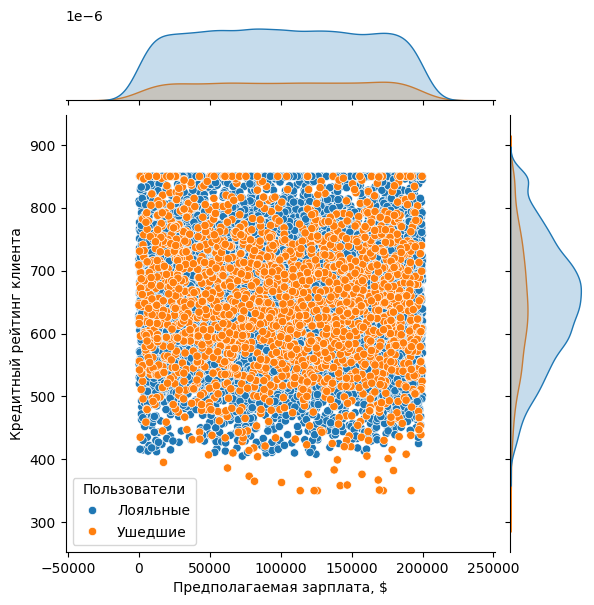

In [7]:
# Создаем новый датафрейм с удобными названиями для отражения на графике
churn_df_copy = churn_df.copy()
churn_df_copy.rename(columns = {'EstimatedSalary':'Предполагаемая зарплата, $',
                                        'CreditScore':'Кредитный рейтинг клиента',
                                        'ExitedName':'Пользователи'}, inplace = True )
# Отражаем взаимосвязть с помощью точечного графика
jointplot = sns.jointplot(
    data=churn_df_copy, 
    x='Предполагаемая зарплата, $', 
    y='Кредитный рейтинг клиента',
    hue='Пользователи'
);

**Комментарий.** Взаимосвязь кредитного рейтинга клиентов и их предполагаемой зараплаты одинакова для лояльных и ушедших клиентов. Для обоих групп пользователей зарплата равномерно рассредоточена по всему рассматриваемому диапазону 0 - 200 000 $, а кредитный рейтинг для большинсва клиентов находится в диапазоне 550-750

##### **9.6.** Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

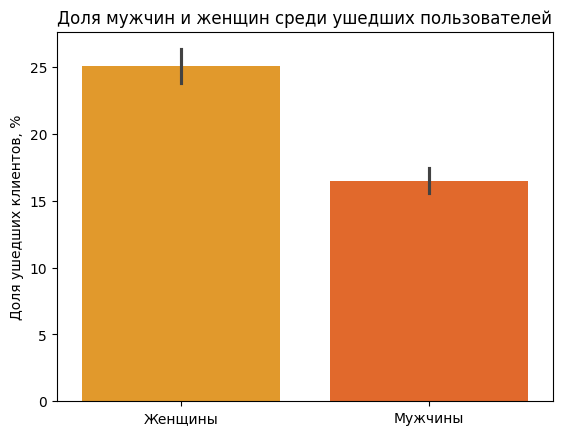

In [8]:
# Считаем долю ушедших среди мужчин и женщин
gender_client_status = churn_df[['Gender', 'Exited']].copy()
# Отразим долю в процентах, а пол обозначим русским языком
gender_client_status['Exited'] = gender_client_status['Exited'].apply(lambda x: x * 100)
gender_client_status['Gender'] = gender_client_status['Gender'].apply(
                                        lambda x: 'Мужчины' if x == 'Male' else 'Женщины')

# Отображаем их соотношение на столбчатой диаграмме
barplot = sns.barplot(
    data=gender_client_status,
    x='Gender',
    y='Exited',
    hue='Gender',
    palette=['#ff9f0e','#ff5f0e'],
    estimator='mean'
)
barplot.set_title('Доля мужчин и женщин среди ушедших пользователей')
barplot.set_xlabel(None)
barplot.set_ylabel('Доля ушедших клиентов, %');

**Комментарий.** Среди женщин доля покинувших банк клиентов выше, чем среди мужчин, и составляет 25 %. Доля ушедших пользователей среди мужчин - 16 %.

##### **9.7.** Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

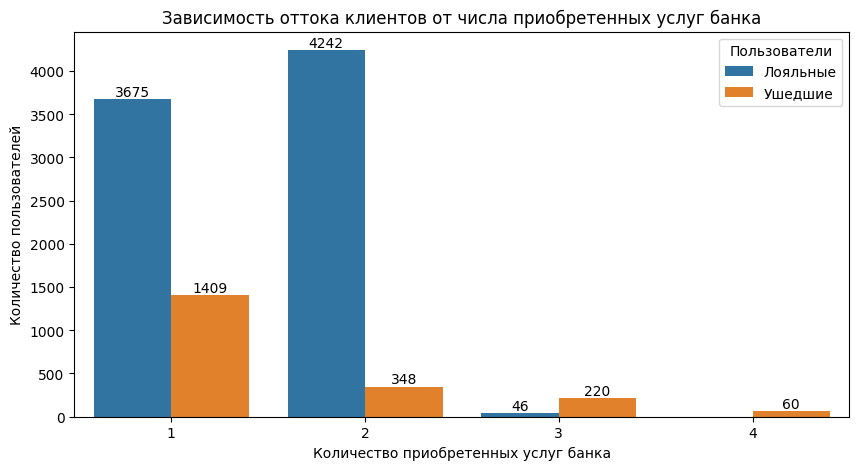

In [22]:
# Подготавливаем данные
clients_products = churn_df[['NumOfProducts', 'Exited', 'ExitedName']].copy()
clients_products.rename(columns = {'ExitedName':'Пользователи'}, inplace = True )

# Визуализируем на столбчатой диаграмме
fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=clients_products,
    x='NumOfProducts',
    y='Exited',
    hue='Пользователи',
    estimator=lambda x: sum(1 for xi in x) # не получилось с помощью count,
)
barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг банка');
barplot.bar_label(barplot.containers[0])
barplot.bar_label(barplot.containers[1])
barplot.set_xlabel('Количество приобретенных услуг банка')
barplot.set_ylabel('Количество пользователей');

**Комментарий.** С увеличение числа приобретенных услуг общее количество ушедших клиентов снижается. Но видно, что при количестве услуг 3 и 4 большая часть клиентов покинула банк.

##### **9.8.** Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

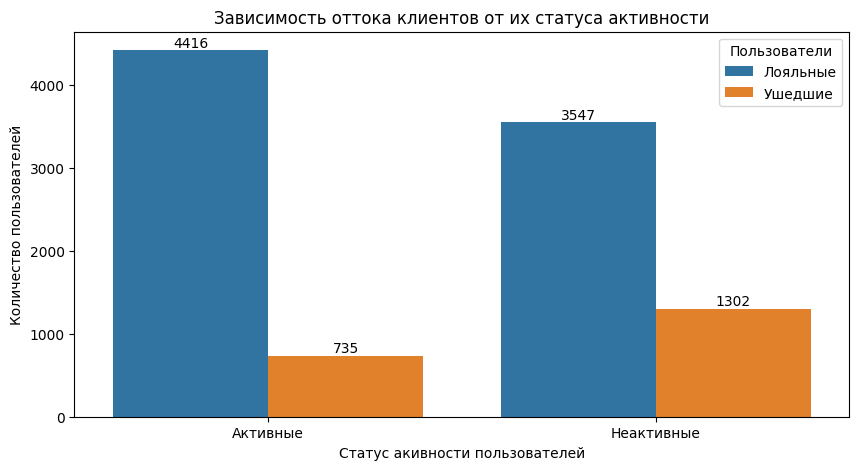

In [10]:
# Подготавливаем данные
clients_active = churn_df[['IsActiveMember', 'Exited', 'ExitedName']].copy()
clients_active['IsActiveMember'] = clients_active['IsActiveMember'].apply(
    lambda x: 'Активные' if x == 1 else 'Неактивные')
clients_active.rename(columns = {'ExitedName':'Пользователи'}, inplace = True )

# Визуализируем на столбчатой диаграмме
fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=clients_active,
    x='IsActiveMember',
    y='Exited',
    hue='Пользователи',
    estimator=lambda x: sum(1 for xi in x), # не получилось с помощью count
)
barplot.set_title('Зависимость оттока клиентов от их статуса активности');
barplot.bar_label(barplot.containers[0])
barplot.bar_label(barplot.containers[1])
barplot.set_xlabel('Статус акивности пользователей')
barplot.set_ylabel('Количество пользователей');

**Комментарий.** Среди активных клиентов отток пользователей меньше. Для уменьшения оттока пользователей среди неактивных необходимо перевести их в статус активных, создать условия и предложения, которые заинтересуют эту группу пользователей.

##### **9.9.** В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
# Готовим данные
clients_exited_country = churn_df[['Geography', 'Exited']].copy()
clients_exited_country = pd.DataFrame(clients_exited_country.groupby('Geography')['Exited'].mean())
clients_exited_country['Exited'] = clients_exited_country['Exited'] * 100
#строим график
fig = px.choropleth(
    data_frame=clients_exited_country, #DataFrame
    locations=clients_exited_country.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    #range_color=[0, 30e6], #диапазон цвета
    title='Доля ушедших клиентов по странам в % от общего числа пользователей банка', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

**Комментарий.** Доля ушедших клиентов в Германии в два раза выше, чем в Испании или Франции, и составляет 32 %. Вероятнее всего условия, предложенные клиентам Германии самые не выгодные для сохранения баланса в банке.

##### **9.10.** Переведите числовой признак CreditScore в категориальный. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,27.500000,20.833333,13.725490,16.831683,13.186813,23.333333,24.137931,12.765957,19.607843,27.083333,25.490196
Fair,21.739130,21.559633,21.304348,21.645022,19.724771,20.689655,23.636364,17.110266,20.901639,19.004525,20.535714
Good,20.382166,20.360825,18.734177,20.596206,19.512195,21.447028,18.285714,19.189189,15.235457,19.466667,19.780220
Poor,22.641509,25.939850,21.176471,21.224490,23.320158,19.915254,17.991632,15.126050,21.457490,25.108225,16.949153
Very_Poor,44.444444,25.373134,15.151515,28.571429,29.310345,14.925373,22.535211,20.634921,25.352113,22.950820,33.333333


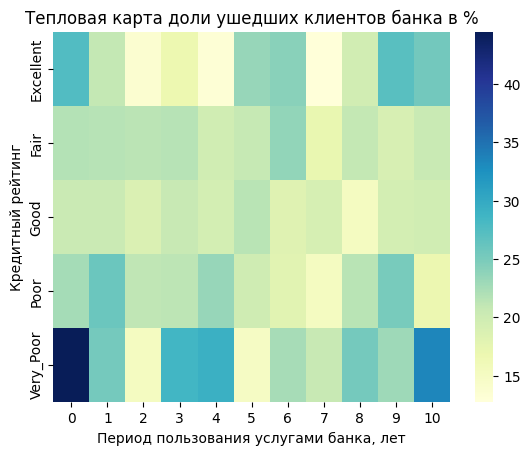

In [24]:
# Функция для определения категорий кредитного рейтинга
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Подготовка данных для визуализации
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
pivot = churn_df.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc=lambda x: sum(x * 100) / len(x) # Выражаем долю в процентах
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

# Визуализация с помощью тепловой карты
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта доли ушедших клиентов банка в %')
heatmap.set_xlabel('Период пользования услугами банка, лет')
heatmap.set_ylabel('Кредитный рейтинг');

**Комментарий.** В основном банк покидают клиенты с очень низким кредитным рейтингом.